In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd /gdrive/MyDrive/Ionosphere

/gdrive/MyDrive/Ionosphere


In [ ]:
ls

Class_Ionosphere.csv


# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [ ]:
df_train=pd.read_csv('Class_Ionosphere.csv')
df_train.head()

,RRD1,RRD2,RRD3,RRD4,RRD5,RRD6,RRD7,RRD8,RRD9,RRD10,...,RRD26,RRD27,RRD28,RRD29,RRD30,RRD31,RRD32,RRD33,RRD34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RRD1    351 non-null    int64  
 1   RRD2    351 non-null    int64  
 2   RRD3    351 non-null    float64
 3   RRD4    351 non-null    float64
 4   RRD5    351 non-null    float64
 5   RRD6    351 non-null    float64
 6   RRD7    351 non-null    float64
 7   RRD8    351 non-null    float64
 8   RRD9    351 non-null    float64
 9   RRD10   351 non-null    float64
 10  RRD11   351 non-null    float64
 11  RRD12   351 non-null    float64
 12  RRD13   351 non-null    float64
 13  RRD14   351 non-null    float64
 14  RRD15   351 non-null    float64
 15  RRD16   351 non-null    float64
 16  RRD17   351 non-null    float64
 17  RRD18   351 non-null    float64
 18  RRD19   351 non-null    float64
 19  RRD20   351 non-null    float64
 20  RRD21   351 non-null    float64
 21  RRD22   351 non-null    float64
 22  RR

In [ ]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,RRD1,RRD2,RRD3,RRD4,RRD5,RRD6,RRD7,RRD8,RRD9,RRD10,RRD11,RRD12,RRD13,RRD14,RRD15,RRD16,RRD17,RRD18,RRD19,RRD20,RRD21,RRD22,RRD23,RRD24,RRD25,RRD26,RRD27,RRD28,RRD29,RRD30,RRD31,RRD32,RRD33,RRD34
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.000000,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.000000,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.000000,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.000000,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA

In [ ]:
df_train.isna().sum().sum()

0

In [ ]:
df_train.columns

Index(['RRD1', 'RRD2', 'RRD3', 'RRD4', 'RRD5', 'RRD6', 'RRD7', 'RRD8', 'RRD9',
       'RRD10', 'RRD11', 'RRD12', 'RRD13', 'RRD14', 'RRD15', 'RRD16', 'RRD17',
       'RRD18', 'RRD19', 'RRD20', 'RRD21', 'RRD22', 'RRD23', 'RRD24', 'RRD25',
       'RRD26', 'RRD27', 'RRD28', 'RRD29', 'RRD30', 'RRD31', 'RRD32', 'RRD33',
       'RRD34', 'Class'],
      dtype='object')

In [ ]:
df_train.Class.value_counts()

g    225
b    126
Name: Class, dtype: int64

In [ ]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [ ]:
binary_cols

['RRD1', 'Class']

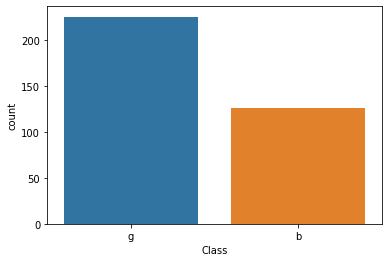

In [ ]:
sns.countplot("Class", data=df_train)

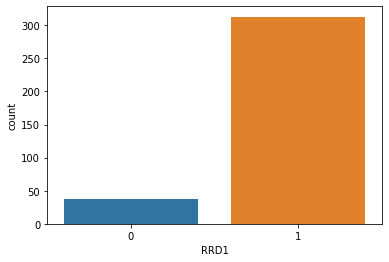

In [ ]:
sns.countplot("RRD1", data=df_train)

In [ ]:
Class_numeric = {'g':1,'b':0}
df_train.Class.replace(Class_numeric, inplace=True)

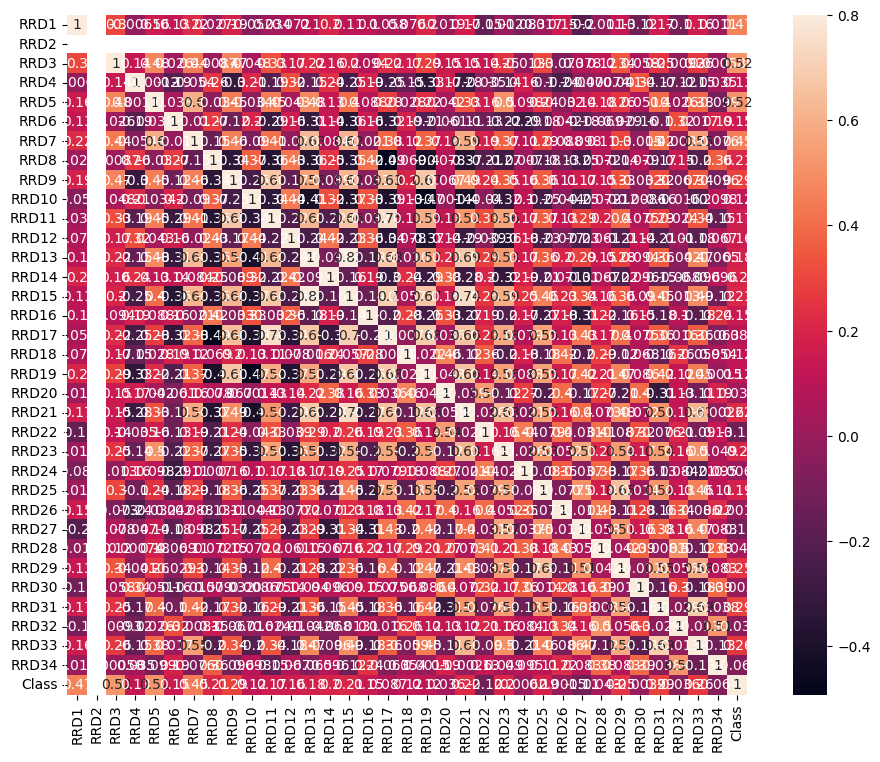

In [ ]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

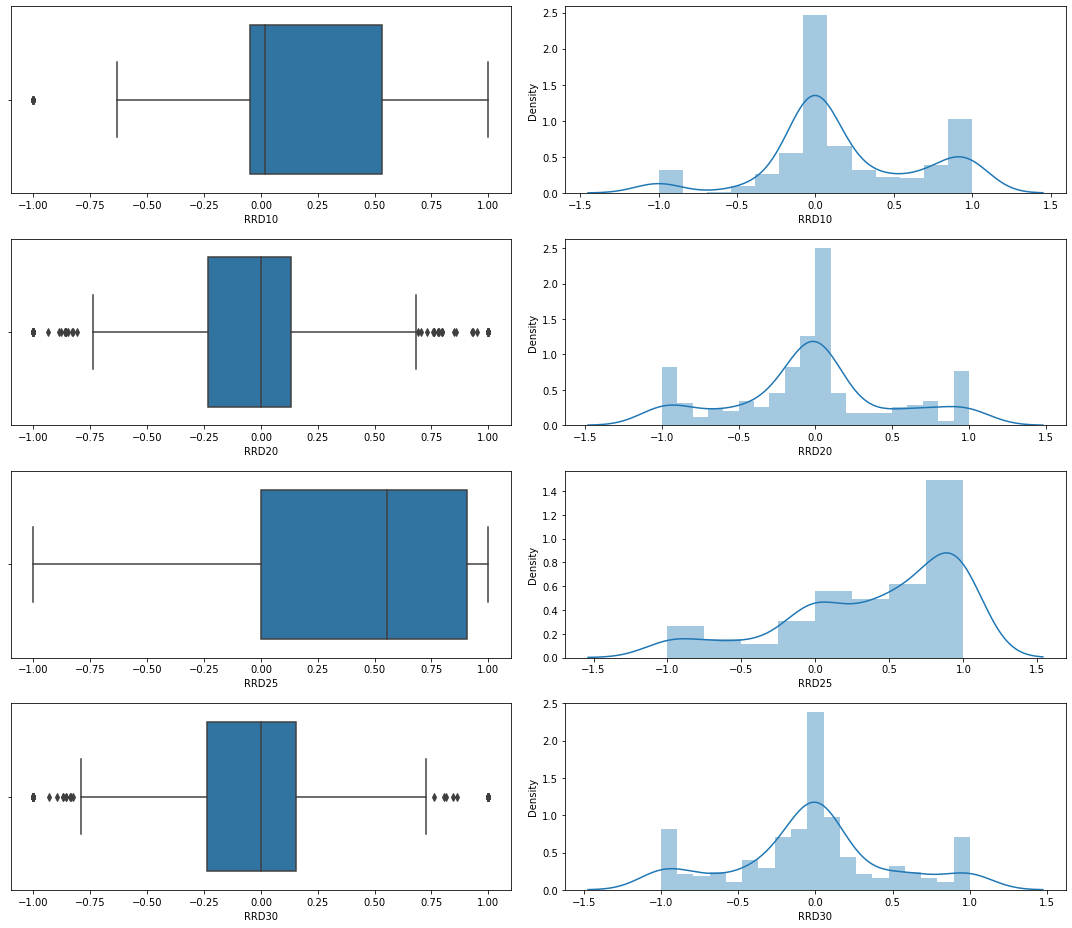

In [ ]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= df_train["RRD10"], ax = ax[0,0])
sns.distplot(df_train['RRD10'], ax = ax[0,1])
sns.boxplot(x= df_train["RRD20"], ax = ax[1,0])
sns.distplot(df_train['RRD20'], ax = ax[1,1])
sns.boxplot(x= df_train["RRD25"], ax = ax[2,0])
sns.distplot(df_train['RRD25'], ax = ax[2,1])
sns.boxplot(x= df_train["RRD30"], ax = ax[3,0])
sns.distplot(df_train['RRD30'], ax = ax[3,1])
plt.tight_layout()

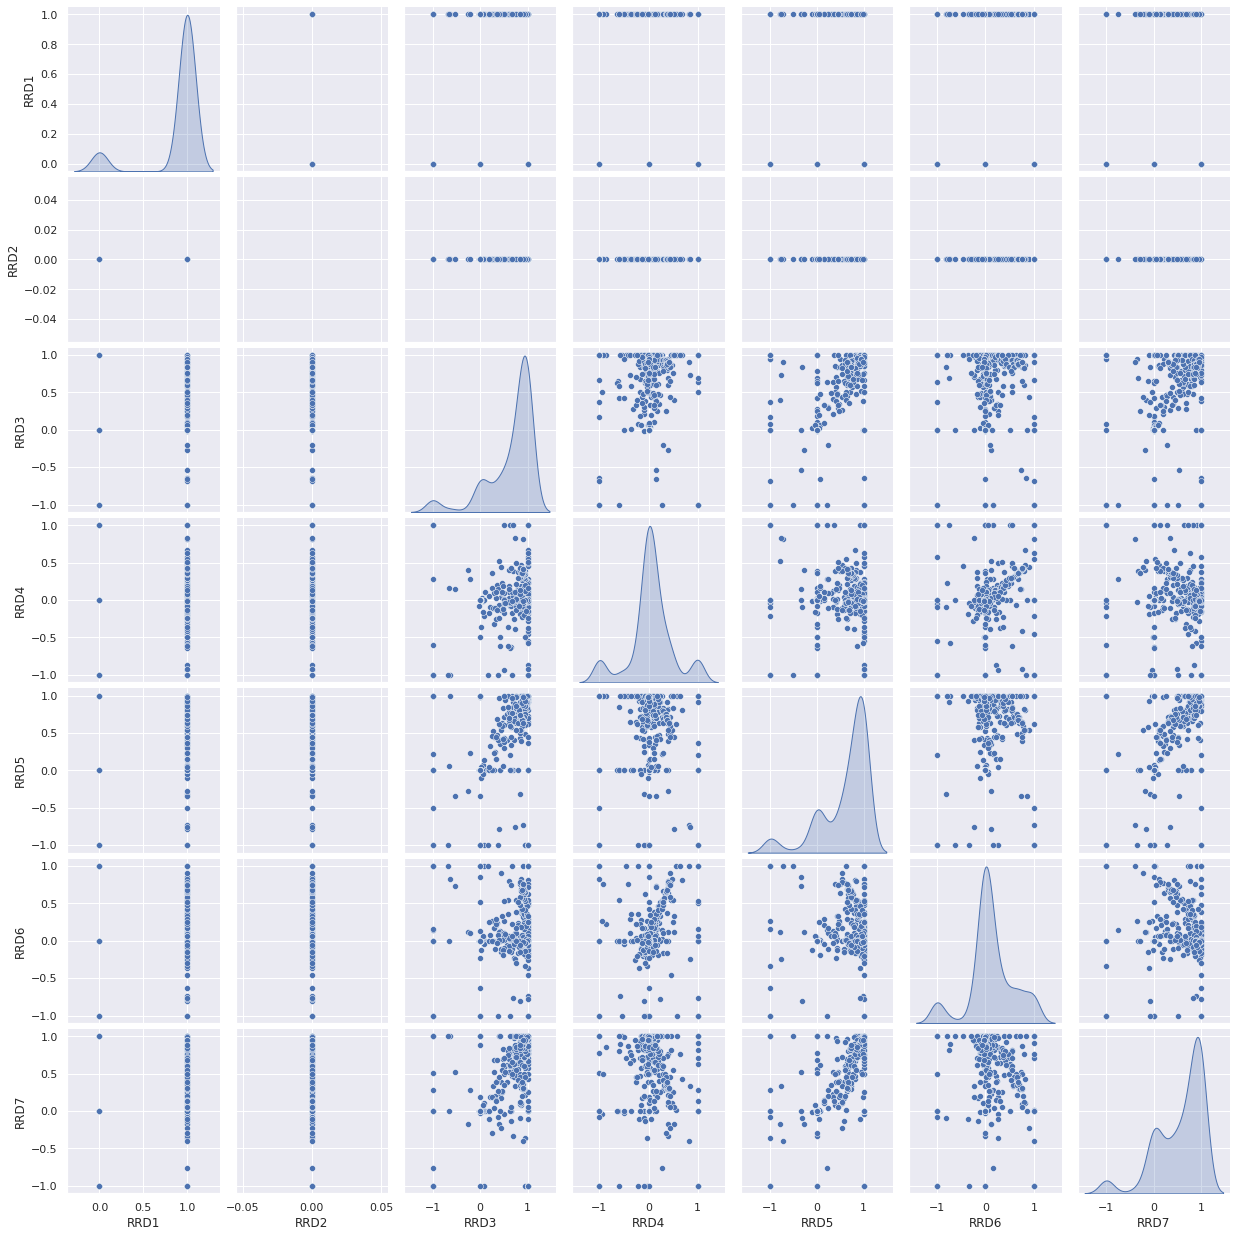

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [ ]:
X = df_train.drop(['Class'], axis = 1)
Y = df_train["Class"]
x_Data = X.values
y_Data = Y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test)

0.8732394366197183

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.94642857 0.83928571 0.875      0.94642857 0.83928571]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.8964285714285715

In [ ]:
confusion_matrix(y_train, pred)

array([[ 74,  24],
       [  5, 177]])

In [ ]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.85      0.95      0.90        43

    accuracy                           0.87        71
   macro avg       0.88      0.85      0.86        71
weighted avg       0.88      0.87      0.87        71



In [ ]:
cma = confusion_matrix(y_test, predicted_test)

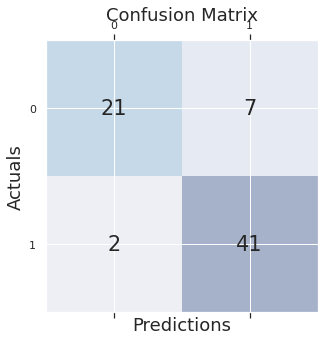

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rf

In [ ]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.9964285714285714

In [ ]:
confusion_matrix(y_train, pred)

array([[ 97,   1],
       [  0, 182]])

In [ ]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.93      0.98      0.95        43

    accuracy                           0.94        71
   macro avg       0.95      0.93      0.94        71
weighted avg       0.94      0.94      0.94        71



In [ ]:
cma = confusion_matrix(y_test, pred_test)

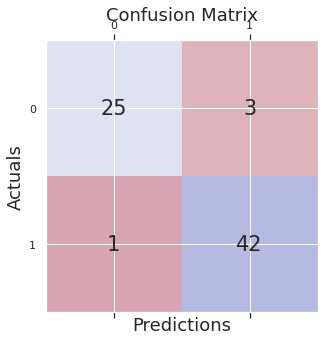

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn import tree

In [ ]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [ ]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [ ]:
confusion_matrix(y_train, pred1)

array([[ 98,   0],
       [  0, 182]])

In [ ]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [ ]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.84      0.98      0.90        43

    accuracy                           0.87        71
   macro avg       0.90      0.85      0.86        71
weighted avg       0.88      0.87      0.87        71



In [ ]:
cma = confusion_matrix(y_test, pred1_test)

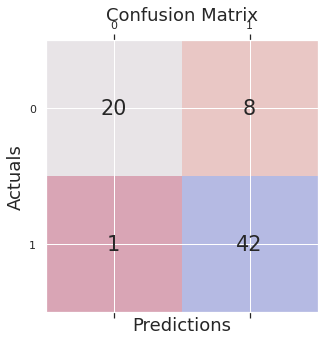

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [ ]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.9214285714285714

In [ ]:
confusion_matrix(y_train, pred_LR)

array([[ 82,  16],
       [  6, 176]])

In [ ]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [ ]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.81      1.00      0.90        43

    accuracy                           0.86        71
   macro avg       0.91      0.82      0.84        71
weighted avg       0.89      0.86      0.85        71



In [ ]:
cma = confusion_matrix(y_test, pred_LR_test)

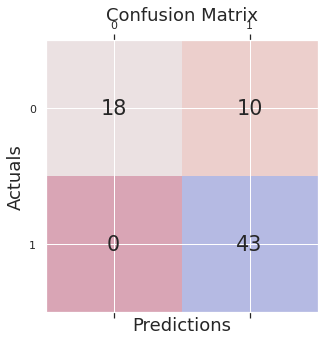

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.9964285714285714

In [ ]:
confusion_matrix(y_train, pred_NN)

array([[ 97,   1],
       [  0, 182]])

In [ ]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [ ]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.91      1.00      0.96        43

    accuracy                           0.94        71
   macro avg       0.96      0.93      0.94        71
weighted avg       0.95      0.94      0.94        71



In [ ]:
cma = confusion_matrix(y_test, pred_NN_test)

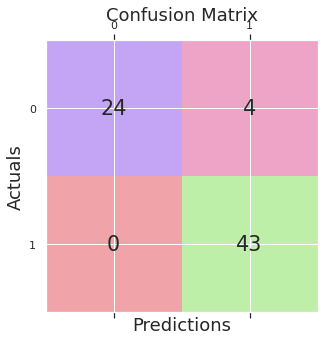

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [ ]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

1.0

In [ ]:
confusion_matrix(y_train, pred_XGB)

array([[ 98,   0],
       [  0, 182]])

In [ ]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [ ]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        28
           1       0.90      1.00      0.95        43

    accuracy                           0.93        71
   macro avg       0.95      0.91      0.92        71
weighted avg       0.94      0.93      0.93        71



In [ ]:
cma = confusion_matrix(y_test, pred_XGB_test)

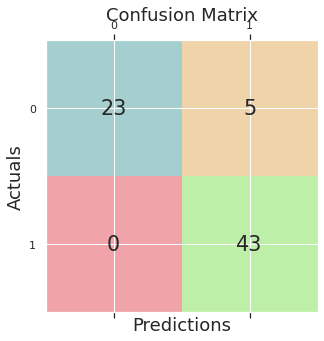

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

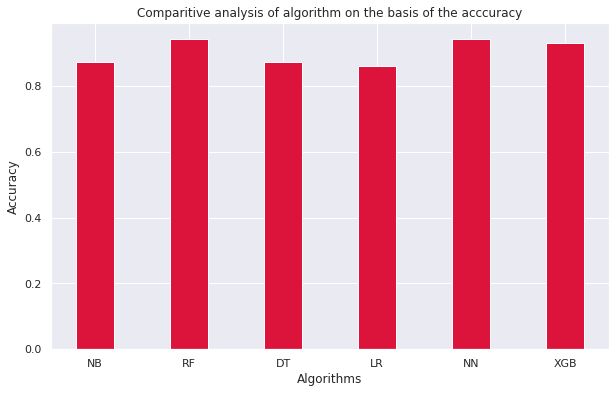

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


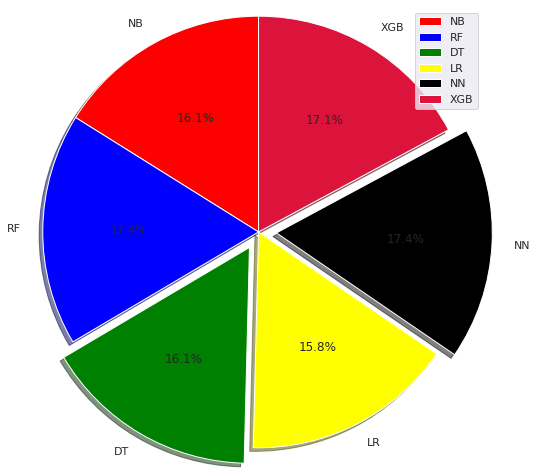

In [ ]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [ ]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']